TIMESERIES AND DATE FUNCTIONOLITY

DATETIME:

Standard Python contains the datetime module to handle with date and time data.

In [1]:
import datetime
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

datetime.datetime(2016, 12, 19, 13, 30)

In [42]:
print(dt) # .day,...
print(dt.strftime("%d %B %Y"))

2016-12-19 13:30:00
19 December 2016


TIMESTAMP

Pandas has its own date and time objects, which are compatible with the standard datetime objects, but provide some more functionality to work with.

The Timestamp object can also be constructed from a string:

In [2]:
import pandas as pd
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

In [4]:
ts.month #can use get only month/day/year.

12

In [45]:
ts + pd.Timedelta('5 days')#time duration

Timestamp('2016-12-24 00:00:00')

In [9]:
#Timestamp data in a Series or DataFrame column
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09, 11:00:00', '2016-12-09 12:00:00'])
s

0     2016-12-09 10:00:00
1    2016-12-09, 11:00:00
2     2016-12-09 12:00:00
dtype: object

STRING FORMAT dates converted into TIMESTAMP objects by using 'to_datetime'.

In [12]:
import pandas as pd
new_s = pd.to_datetime(s)
new_s

ValueError: time data "2016-12-09, 11:00:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [13]:
import pandas as pd

# Sample data for river discharge (in cubic meters per second, m³/s)
data = {
    'datetime': pd.date_range(start='2024-01-01', end='2024-01-10', freq='3H'),
    'discharge_m3/s': [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 
                       2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 
                       3.2, 3.3, 3.4, 3.5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set datetime column as index
df.set_index('datetime', inplace=True)

# Display the first few rows of the dataframe
print(df.head())


C:\Users\rammo\AppData\Local\Temp\ipykernel_13408\305511049.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime': pd.date_range(start='2024-01-01', end='2024-01-10', freq='3H'),


ValueError: All arrays must be of the same length

Exporting DATAFRAME to csv file.

In [15]:
import pandas as pd

# Assuming df is your DataFrame
data = {
    'datetime': pd.date_range(start='2024-01-01', periods=24, freq='3H'),
    'discharge_m3/s': [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 
                       2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 
                       3.2, 3.3, 3.4, 3.5]
}

df = pd.DataFrame(data)

# Export DataFrame to CSV
df.to_csv("C:/Users/rammo/OneDrive/Desktop/river_discharge_data.csv", index=False)

C:\Users\rammo\AppData\Local\Temp\ipykernel_13408\737052836.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime': pd.date_range(start='2024-01-01', periods=24, freq='3H'),


Parsing time series information from various sources and formats

pd.read_csv provides a lot of built-in functionality to support this kind of transactions when reading in a file! 
Check the help of the read_csv function...

In [71]:
data = pd.read_csv("C:/Users/rammo/OneDrive/Desktop/river_discharge_data.csv", index_col=0, parse_dates=True)
data

,discharge_m3/s
datetime,
2024-01-01 00:00:00,1.2
2024-01-01 03:00:00,1.3
2024-01-01 06:00:00,1.4
2024-01-01 09:00:00,1.5
2024-01-01 12:00:00,1.6
2024-01-01 15:00:00,1.7
2024-01-01 18:00:00,1.8
2024-01-01 21:00:00,1.9
2024-01-02 00:00:00,2.0


In [54]:
new = pd.to_datetime(["1/1/2018", np.datetime64("2018-01-01"), datetime.datetime(2018, 1, 1)])
print(new)

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)


The DatetimeIndex
When we ensure the DataFrame has a DatetimeIndex, time-series related functionality becomes available:

data.index
Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [20]:
data.index

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 03:00:00',
               '2024-01-01 06:00:00', '2024-01-01 09:00:00',
               '2024-01-01 12:00:00', '2024-01-01 15:00:00',
               '2024-01-01 18:00:00', '2024-01-01 21:00:00',
               '2024-01-02 00:00:00', '2024-01-02 03:00:00',
               '2024-01-02 06:00:00', '2024-01-02 09:00:00',
               '2024-01-02 12:00:00', '2024-01-02 15:00:00',
               '2024-01-02 18:00:00', '2024-01-02 21:00:00',
               '2024-01-03 00:00:00', '2024-01-03 03:00:00',
               '2024-01-03 06:00:00', '2024-01-03 09:00:00',
               '2024-01-03 12:00:00', '2024-01-03 15:00:00',
               '2024-01-03 18:00:00', '2024-01-03 21:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [21]:
data.index.day

Index([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3], dtype='int32', name='datetime')

In [22]:
data.index.dayofyear

Index([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3], dtype='int32', name='datetime')

In [23]:
data.index.year

Index([2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='datetime')

<Axes: xlabel='datetime'>

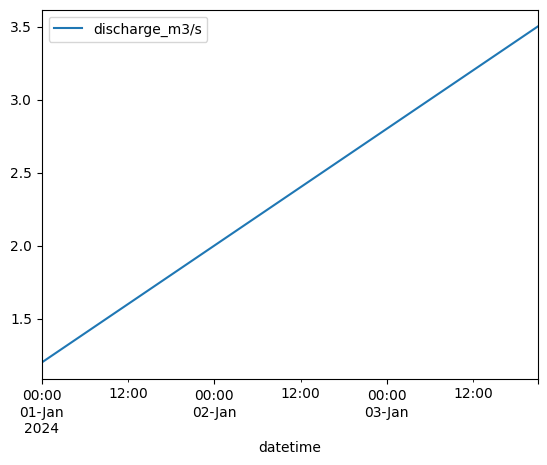

In [27]:
data.plot()

Generate sequences of fixed-frequency dates and time spans

In [7]:
dti = pd.date_range("2018-01-01", periods=3, freq="h")
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='h')

Manipulating and converting date times with timezone information

In [14]:
dti.tz_convert("US/Pacific")

DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='h')

The Power of pandas RESAMPLE

A very powerfull method is resample: converting the frequency of the time series (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

NOTE:

with older versions of pandas, data.resample('D').mean() was expressed as data.resample('D', how='mean').

In [72]:
data.resample('D').mean().head()

,discharge_m3/s
datetime,
2024-01-01,1.55
2024-01-02,2.35
2024-01-03,3.15


In [73]:
data.resample('D').max().head()

,discharge_m3/s
datetime,
2024-01-01,1.9
2024-01-02,2.7
2024-01-03,3.5


In [19]:
#Resampling or converting a time series to a particular frequency
idx = pd.date_range("2018-01-01", periods=5, freq="h")
idx
ts = pd.Series(range(len(idx)), index=idx)

ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: h, dtype: int64

In [20]:
ts.resample("2h").mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2h, dtype: float64

![alt text][def]

[def]: image-1.png

pandas captures 4 general time related concepts:

1.Date times:
 A specific date and time with timezone support. Similar to datetime.datetime from the standard library.

2.Time deltas: 
An absolute time duration. Similar to datetime.timedelta from the standard library.

3.Time spans: A span of time defined by a point in time and its associated frequency.

4.Date offsets: 
A relative time duration that respects calendar arithmetic. Similar to dateutil.relativedelta.relativedelta from the dateutil package.

Performing date and time arithmetic with absolute or relative time increments

In [51]:
#creating TIMESTAMP objects.
from datetime import datetime
from pytz import timezone

# Create a timezone object for New York
ny_tz = timezone('America/New_York')

# Create a datetime object for 2022-01-01 12:00:00 in
# New York timezone
dt = datetime(2022, 1, 1, 12, 0,
              tzinfo=ny_tz)
print(dt)



2022-01-01 12:00:00-04:56


In [54]:

friday = pd.Timestamp("2018-01-05")
print(friday.day_name())

Friday
2018-01-10 00:00:00
Wednesday


Selecting data from a time series
We can use label based indexing on a timeseries as expected:

In [30]:
data[pd.Timestamp("2024-01-01 09:00"):pd.Timestamp("2024-01-01 19:00")]

,discharge_m3/s
datetime,
2024-01-01 09:00:00,1.5
2024-01-01 12:00:00,1.6
2024-01-01 15:00:00,1.7
2024-01-01 18:00:00,1.8


In [31]:
#But, for convenience, indexing a time series also works with strings:

data["2024-01-01 09:00":"2024-01-01 19:00"]

,discharge_m3/s
datetime,
2024-01-01 09:00:00,1.5
2024-01-01 12:00:00,1.6
2024-01-01 15:00:00,1.7
2024-01-01 18:00:00,1.8


In [25]:
#adding 1 day
saturday = friday + pd.Timedelta("1 day")
saturday.day_name()

'Saturday'

In [28]:
#adding 1 business day
monday = friday + pd.offsets.BDay()
monday.day_name()



'Monday'

pd.DateOffset:
a class in pandas that represents a relative offset from a date or datetime. It allows you to specify offsets like days, months, years, etc., which can be added or subtracted from dates or datetimes.

timedalta  vs dateoffset

Timedelta is part of the core Python datetime module.
DateOffset is specific to pandas.(Bday,Monthend)

In [61]:
monday=pd.Timestamp('2024-6-27')
new_date = monday+pd.DateOffset(days=5,hours=5)
delta_time = monday+pd.Timedelta(days=5,hours=5)
print(new_date)
print(new_date.day_name())
print(delta_time)

2024-07-02 05:00:00
Tuesday
2024-07-02 05:00:00


In [31]:
#creating a series.
#pd.Series([pd.DateOffset(1), pd.DateOffset(2)])

import pandas as pd

# Creating a Series of pd.DateOffset objects
series_offsets = pd.Series([pd.DateOffset(1), pd.DateOffset(2)])
print(series_offsets)

base_date = pd.Timestamp('2024-06-24')
future_dates = base_date + series_offsets
print(future_dates)

0         <DateOffset>
1    <2 * DateOffsets>
dtype: object
0    2024-06-25 00:00:00
1    2024-06-26 00:00:00
dtype: object


1.Pandas represents null date times, time deltas, and time spans as NaT (Not a Time) for missing and null dates.

2.similar as np.nan does for float data.


In [32]:
pd.Timestamp(pd.NaT)

NaT

In [33]:
pd.Timedelta(pd.NaT)

NaT

In [34]:
pd.Period(pd.NaT)

NaT

1.Use pd.Timestamp for logging events, time-stamping data entries, or recording specific points in time.

2.Use pd.Timedelta for calculating differences between dates, adding offsets to dates, or measuring durations.

3.Use pd.Period for organizing time series data into fixed-frequency intervals (e.g., monthly sales, quarterly reports).

In [38]:
ts = pd.Timestamp('2024-06-24 08:00:00')#specific time zone,indexing,slicing,arthimetic
td = pd.Timedelta(days=5, hours=2)#duration
pr = pd.Period('2024-06', freq='M')#specific time span intervals
print(ts)
print(td)
print(pr)

2024-06-24 08:00:00
5 days 02:00:00
2024-06


URL tutorial:
https://pandas.pydata.org/docs/user_guide/timeseries.html